<a href="https://colab.research.google.com/github/rautela10/Documents/blob/rautela10-patch-1/Regression%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv('magic04.data', names =cols)
df.head()
#df["class"].unique()
df["class"] = (df["class"] == "g").astype(int)
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True)
  plt.hist(df[df["class"]==0][label], color='red', label='hadron', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()


NameError: ignored

In [ ]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

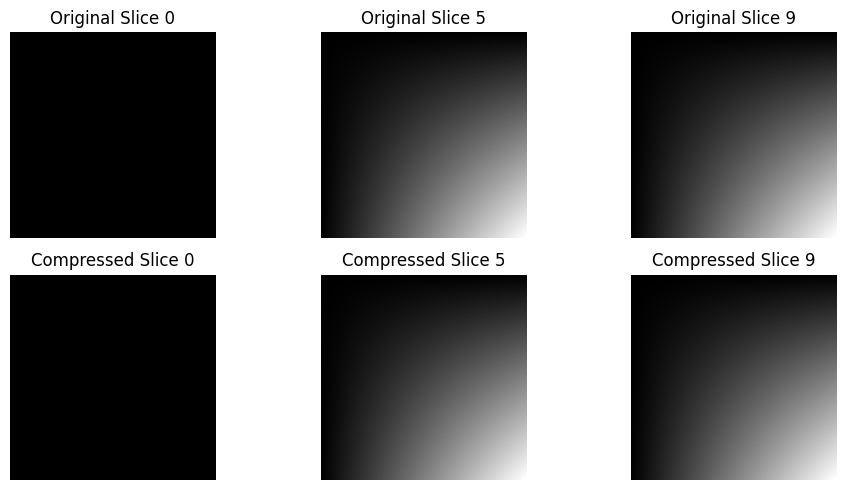

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Create a synthetic 3D gradient image (stack of 2D images)
depth, rows, cols = 10, 100, 100
A_3D = np.array([np.outer(np.linspace(0, d/depth, rows), np.linspace(0, 1, cols)) for d in range(depth)])

# Apply SVD and compression on each 2D slice
k = 5
compressed_3D = []
for slice in A_3D:
    U, Sigma, Vt = np.linalg.svd(slice, full_matrices=False)
    U_k = U[:, :k]
    Sigma_k = np.diag(Sigma[:k])
    Vt_k = Vt[:k, :]
    compressed_slice = np.dot(U_k, np.dot(Sigma_k, Vt_k))
    compressed_3D.append(compressed_slice)
compressed_3D = np.array(compressed_3D)

# Visualize a few slices from the original and compressed 3D images
slices_to_show = [0, depth//2, depth-1]

plt.figure(figsize=(10, 5))
for idx, slice_idx in enumerate(slices_to_show, 1):
    plt.subplot(2, len(slices_to_show), idx)
    plt.imshow(A_3D[slice_idx], cmap='gray')
    plt.title(f'Original Slice {slice_idx}')
    plt.axis('off')

    plt.subplot(2, len(slices_to_show), idx + len(slices_to_show))
    plt.imshow(compressed_3D[slice_idx], cmap='gray')
    plt.title(f'Compressed Slice {slice_idx}')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [5]:
import numpy as np
import pandas as pd
from scipy.sparse import coo_matrix
import implicit
from scipy.sparse import csr_matrix

user_movie_matrix_csr = csr_matrix(user_movie_matrix)


# Load the MovieLens dataset
data = pd.read_csv('ratings.csv')

# Convert explicit ratings to implicit feedback
data['interaction'] = data['rating'].apply(lambda x: 1 if x > 3.5 else 0)

# Create a sparse matrix
user_movie_matrix = coo_matrix((data['interaction'], (data['userId'], data['movieId'])))


user_movie_matrix_csr = csr_matrix(user_movie_matrix)
print(user_movie_matrix_csr.shape)
# Apply ALS using the implicit library
model = implicit.als.AlternatingLeastSquares(factors=50, regularization=0.01, iterations=20)
model.fit(user_movie_matrix.T)  # Note: We transpose the matrix because implicit expects item-user format

# Get recommendations for a user (e.g., user_id=1)
user_id = 1
# recommended = model.recommend(user_id, user_movie_matrix)
recommended = model.recommend(user_id, user_movie_matrix_csr)

user_movie_matrix = coo_matrix((data['interaction'], (data['userId'], data['movieId'])))


# Print recommended movie IDs
print([item[0] for item in recommended])


/usr/local/lib/python3.10/dist-packages/implicit/gpu/__init__.py:13: UserWarning: CUDA extension is built, but disabling GPU support because of 'Cuda Error: CUDA driver version is insufficient for CUDA runtime version (/project/./implicit/gpu/utils.h:71)'
  warnings.warn(


NameError: ignored

In [7]:

# Non negative matrix Factorization - NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# Sample documents
documents = [
    "apple banana fruit",
    "apple orange fruit",
    "car bike vehicle",
    "bike scooter vehicle",
    "apple computer technology",
    "laptop computer technology"
]

# Convert documents to term-document matrix
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

# Apply NMF
nmf = NMF(n_components=3, init='random', random_state=0)
W = nmf.fit_transform(X)
H = nmf.components_

# Display topics
##   print(f"Topic {i + 1}: {', '.join([vectorizer.get_feature_names()[j] for j in topic.argsort()[-3:]])}")

# ... [rest of the code remains unchanged]

# Display topics
for i, topic in enumerate(H):
    print(f"Topic {i + 1}: {', '.join([vectorizer.get_feature_names_out()[j] for j in topic.argsort()[-3:]])}")


Topic 1: laptop, computer, technology
Topic 2: orange, apple, fruit
Topic 3: car, bike, vehicle


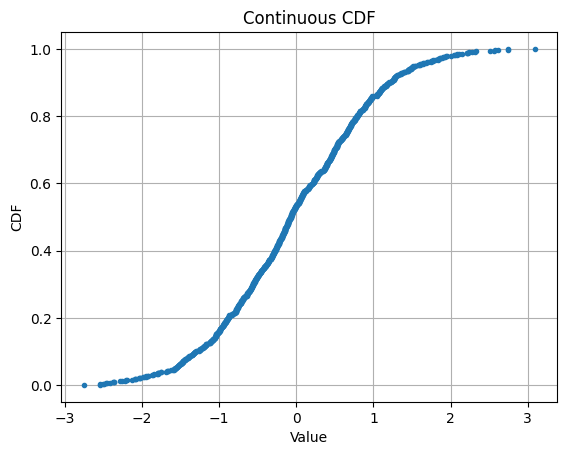

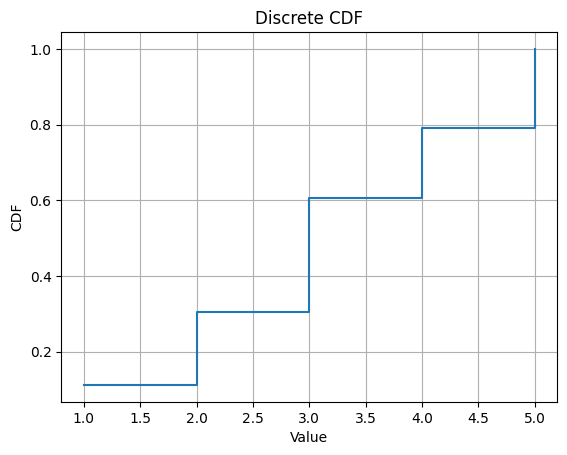

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Continuous CDF Example
def plot_continuous_cdf(data):
    data_sorted = np.sort(data)
    p = np.arange(1, len(data) + 1) / len(data)
    plt.plot(data_sorted, p, marker='.', linestyle='none')
    plt.xlabel('Value')
    plt.ylabel('CDF')
    plt.title('Continuous CDF')
    plt.grid(True)
    plt.show()

# Discrete CDF Example
def plot_discrete_cdf(data):
    values, counts = np.unique(data, return_counts=True)
    cumulative_counts = np.cumsum(counts)
    cdf = cumulative_counts / len(data)
    plt.step(values, cdf, where='post')
    plt.xlabel('Value')
    plt.ylabel('CDF')
    plt.title('Discrete CDF')
    plt.grid(True)
    plt.show()

# Generate sample data for demonstration
continuous_data = np.random.normal(0, 1, 1000)  # Sample data from a normal distribution
discrete_data = np.random.choice([1, 2, 3, 4, 5], size=1000, p=[0.1, 0.2, 0.3, 0.2, 0.2])  # Sample data from a discrete distribution

# Plot CDFs
plot_continuous_cdf(continuous_data)
plot_discrete_cdf(discrete_data)


# New Section

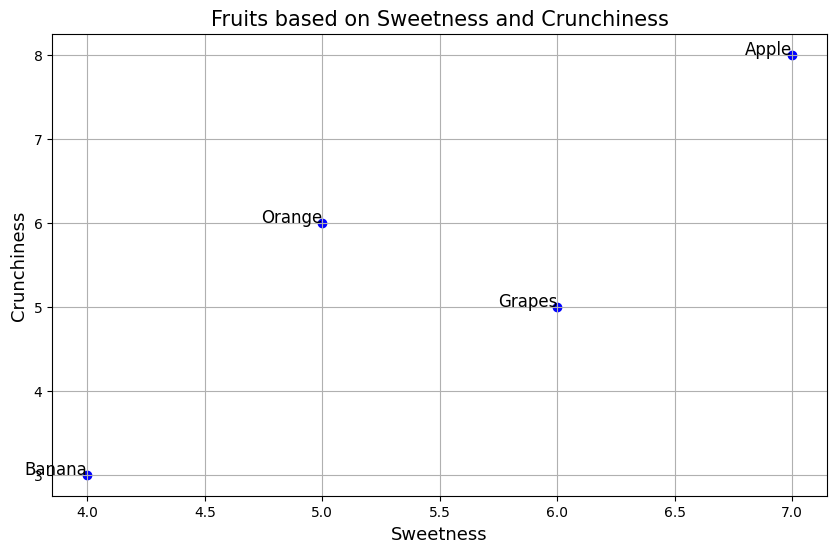

In [1]:
import matplotlib.pyplot as plt

# Sample data: Fruits and their sweetness and crunchiness levels
fruits = ['Apple', 'Orange', 'Banana', 'Grapes']
sweetness = [7, 5, 4, 6]
crunchiness = [8, 6, 3, 5]

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(sweetness, crunchiness, color='blue')

# Label the points
for i, fruit in enumerate(fruits):
    plt.annotate(fruit, (sweetness[i], crunchiness[i]), fontsize=12, ha='right')

# Set the title and labels
plt.title('Fruits based on Sweetness and Crunchiness', fontsize=15)
plt.xlabel('Sweetness', fontsize=13)
plt.ylabel('Crunchiness', fontsize=13)
plt.grid(True)

# Show the plot
plt.show()

# New Section

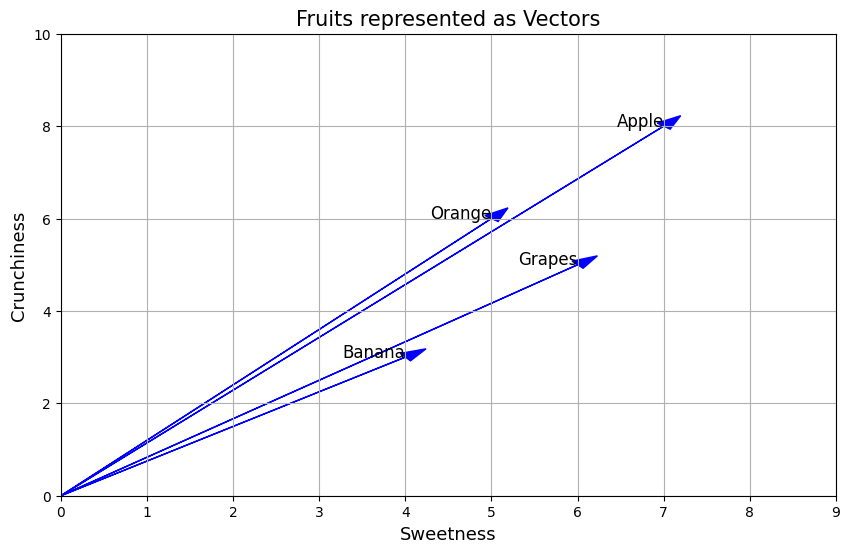

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data: Fruits and their sweetness and crunchiness levels
fruits = ['Apple', 'Orange', 'Banana', 'Grapes']
sweetness = [7, 5, 4, 6]
crunchiness = [8, 6, 3, 5]

# Create a plot with arrows representing vectors
plt.figure(figsize=(10, 6))
for i, fruit in enumerate(fruits):
    plt.arrow(0, 0, sweetness[i], crunchiness[i], head_width=0.2, head_length=0.3, fc='blue', ec='blue')
    plt.annotate(fruit, (sweetness[i], crunchiness[i]), fontsize=12, ha='right')

# Set the title, labels, and limits
plt.title('Fruits represented as Vectors', fontsize=15)
plt.xlabel('Sweetness', fontsize=13)
plt.ylabel('Crunchiness', fontsize=13)
plt.xlim(0, max(sweetness) + 2)
plt.ylim(0, max(crunchiness) + 2)
plt.grid(True)

# Show the plot
plt.show()

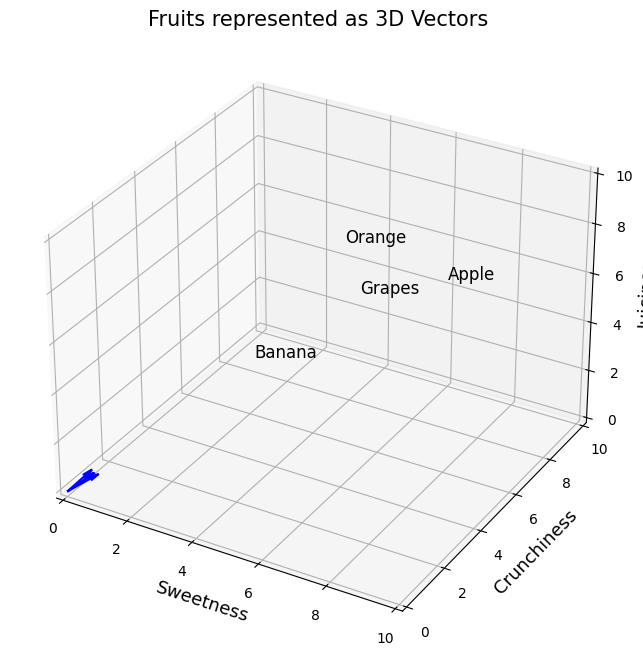

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data: Fruits and their sweetness, crunchiness, and juiciness levels
fruits = ['Apple', 'Orange', 'Banana', 'Grapes']
sweetness = [7, 5, 4, 6]
crunchiness = [8, 6, 3, 5]
juiciness = [6, 8, 5, 7]

# Create a 3D plot with arrows representing vectors
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i, fruit in enumerate(fruits):
    ax.quiver(0, 0, 0, sweetness[i], crunchiness[i], juiciness[i], length=1, normalize=True, color='blue')
    ax.text(sweetness[i], crunchiness[i], juiciness[i], fruit, fontsize=12)

# Set the title, labels, and limits
ax.set_title('Fruits represented as 3D Vectors', fontsize=15)
ax.set_xlabel('Sweetness', fontsize=13)
ax.set_ylabel('Crunchiness', fontsize=13)
ax.set_zlabel('Juiciness', fontsize=13)
ax.set_xlim([0, 10])
ax.set_ylim([0, 10])
ax.set_zlim([0, 10])

# Show the plot
plt.show()

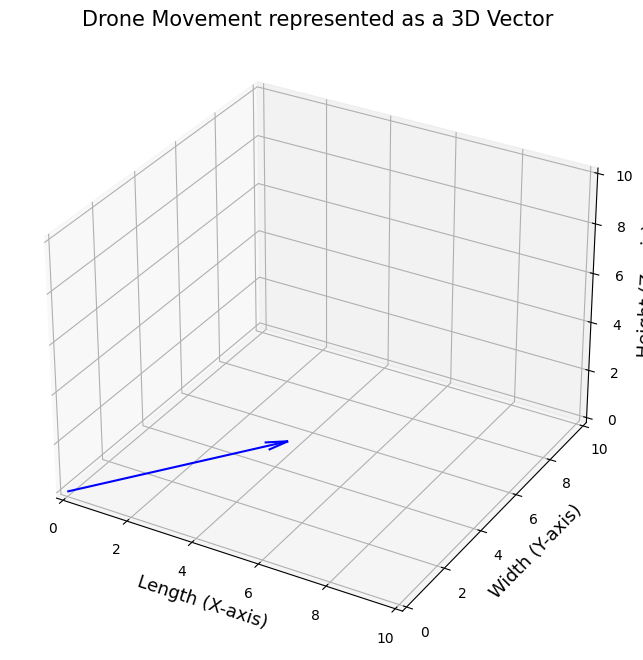

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Drone's movement in terms of length (X), width (Y), and height (Z)
movement = [5, 3, 2]

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the vector representing the drone's movement
ax.quiver(0, 0, 0, movement[0], movement[1], movement[2], color='blue', arrow_length_ratio=0.1)

# Set the title, labels, and limits
ax.set_title('Drone Movement represented as a 3D Vector', fontsize=15)
ax.set_xlabel('Length (X-axis)', fontsize=13)
ax.set_ylabel('Width (Y-axis)', fontsize=13)
ax.set_zlabel('Height (Z-axis)', fontsize=13)
ax.set_xlim([0, 10])
ax.set_ylim([0, 10])
ax.set_zlim([0, 10])

# Show the plot
plt.show()

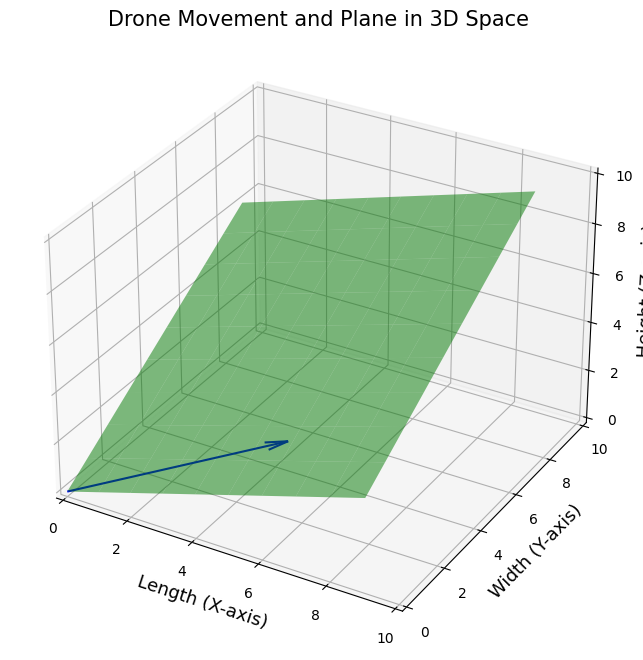

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Drone's movement in terms of length (X), width (Y), and height (Z)
movement = [5, 3, 2]

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the vector representing the drone's movement
ax.quiver(0, 0, 0, movement[0], movement[1], movement[2], color='blue', arrow_length_ratio=0.1)

# Draw the plane formed by the vector and the origin
xx, yy = np.meshgrid(range(10), range(10))
zz = (movement[2]/movement[0]) * xx + (movement[2]/movement[1]) * yy
ax.plot_surface(xx, yy, zz, alpha=0.5, color='green')

# Set the title, labels, and limits
ax.set_title('Drone Movement and Plane in 3D Space', fontsize=15)
ax.set_xlabel('Length (X-axis)', fontsize=13)
ax.set_ylabel('Width (Y-axis)', fontsize=13)
ax.set_zlabel('Height (Z-axis)', fontsize=13)
ax.set_xlim([0, 10])
ax.set_ylim([0, 10])
ax.set_zlim([0, 10])

# Show the plot
plt.show()

In [2]:
import numpy as np

# Coefficient Matrix A
A = np.array([[1, 1, 1],
              [0, 2, 5],
              [2, 5, -1]])

# Column Matrix B
B = np.array([6, -4, 27])

# Compute the inverse of A
# Here, we're computing the inverse of the matrix A using the inv() function from numpy's
#linalg (linear algebra) module. The inverse of a matrix, when multiplied with the original matrix,
# gives the identity matrix. Not all matrices have inverses, but in this case, our matrix A is invertible.
A_inv = np.linalg.inv(A)

# Compute the solution X
X = np.dot(A_inv, B)

X

array([ 5.,  3., -2.])

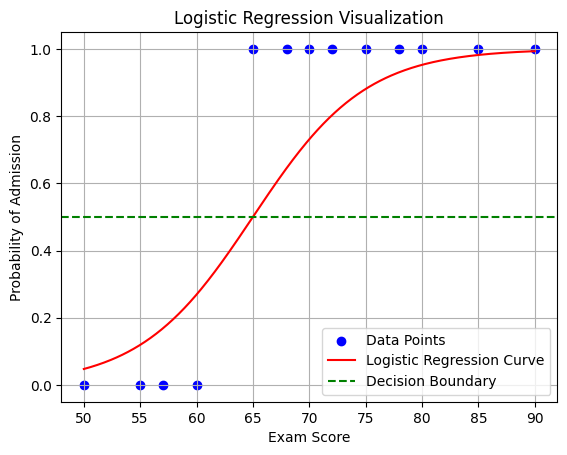

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Mock data
exam_scores = np.array([50, 55, 57, 60, 65, 68, 70, 72, 75, 78, 80, 85, 90])
admitted = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Logistic function
def logistic_function(x):
    return 1 / (1 + np.exp(-0.2*(x-65)))

# Generate curve
x = np.linspace(50, 90, 400)
y = logistic_function(x)

# Plotting
plt.scatter(exam_scores, admitted, color='blue', label='Data Points')
plt.plot(x, y, color='red', label='Logistic Regression Curve')
plt.axhline(y=0.5, color='green', linestyle='--', label='Decision Boundary')
plt.xlabel('Exam Score')
plt.ylabel('Probability of Admission')
plt.title('Logistic Regression Visualization')
plt.legend()
plt.grid(True)
plt.show()

In [2]:
import numpy as np

# Mock data
exam_scores = np.array([50, 55, 57, 60, 65, 68, 70, 72, 75, 78, 80, 85, 90])
admitted = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Logistic function
def logistic_function(x):
    return 1 / (1 + np.exp(-0.2*(x-65)))

# Generate predictions
predicted_probabilities = logistic_function(exam_scores)
predicted_admission = (predicted_probabilities > 0.5).astype(int)

# Compute TP, FP, FN, and TN
TP = np.sum((predicted_admission == 1) & (admitted == 1))
FP = np.sum((predicted_admission == 1) & (admitted == 0))
FN = np.sum((predicted_admission == 0) & (admitted == 1))
TN = np.sum((predicted_admission == 0) & (admitted == 0))

# Compute Precision and Recall
precision = TP / (TP + FP)
recall = TP / (TP + FN)

# Compute F1 Score
f1_score = 2 * (precision * recall) / (precision + recall)
f1_score

0.9411764705882353

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import numpy as np

# Mock data
exam_scores = np.array([50, 55, 57, 60, 65, 68, 70, 72, 75, 78, 80, 85, 90]).reshape(-1, 1)
admitted = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

print(exam_scores)
print(admitted)

# Train a logistic regression model
clf = LogisticRegression()
clf.fit(exam_scores, admitted)

# Predict admission probabilities and classify
predicted_probabilities = clf.predict_proba(exam_scores)[:, 1]
predicted_admission = clf.predict(exam_scores)

# Compute F1 Score
f1 = f1_score(admitted, predicted_admission)
f1

[[50]
 [55]
 [57]
 [60]
 [65]
 [68]
 [70]
 [72]
 [75]
 [78]
 [80]
 [85]
 [90]]
[0 0 0 0 1 1 1 1 1 1 1 1 1]


1.0

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix
import numpy as np

# Generate data using numpy
np.random.seed(0)
exam_scores = np.random.randint(50, 91, 100).reshape(-1, 1)
admitted = (exam_scores > 65).astype(int).flatten()

# Train a logistic regression model
clf = LogisticRegression()
clf.fit(exam_scores, admitted)

# Predict admission
predicted_admission = clf.predict(exam_scores)

# Compute F1 Score
f1 = f1_score(admitted, predicted_admission)

# Compute Confusion Matrix
conf_matrix = confusion_matrix(admitted, predicted_admission)

f1, conf_matrix

(1.0,
 array([[45,  0],
        [ 0, 55]]))

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np

# Generate data using numpy
np.random.seed(0)
exam_scores = np.random.randint(5, 9, 10).reshape(-1, 1)
admitted = (exam_scores > 5).astype(int).flatten()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(exam_scores, admitted, test_size=0.2, random_state=0)


# Train a logistic regression model
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Predict admission on the testing set
predicted_admission = clf.predict(X_test)

# Compute F1 Score on the testing set
f1 = f1_score(y_test, predicted_admission)

# Compute Confusion Matrix on the testing set
conf_matrix = confusion_matrix(y_test, predicted_admission)

f1, conf_matrix

(0.0,
 array([[0, 0],
        [2, 0]]))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np

# Generate data using numpy
np.random.seed(0)
exam_scores = np.random.randint(5, 9, 10).reshape(-1, 1)
admitted = (exam_scores > 5).astype(int).flatten()


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(exam_scores, admitted, test_size=0.2, random_state=0)

print('X_train:',X_train)
print('X_test:',X_test)
print('y_train:',y_train)
print('y_test:',y_test)

# Train a logistic regression model
clf = LogisticRegression()
clf.fit(X_train, y_train)


# Evaluate the model
p_predict = clf.predict_proba(X_train)
y_predict = clf.predict(X_train)
exam_scores = clf.score (X_train, y_train )
confusion_m = confusion_matrix(y_train,y_predict)

print('p_predict:', p_predict)
print('y_predict:', y_predict)
print('confusion_m:', confusion_m)

# Predict admission on the testing set
predicted_admission = clf.predict(X_test)

# Generate Classification Report
report = classification_report(y_test, predicted_admission)

report

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Generate synthetic data
np.random.seed(0)
# Features: hours studied and attendance rate
#  using column_stack method of numpy to generate 2d array by staking,
# column_stack ( x, y ), x=np.random.randint(1, 10, 100)
# y= np.random.rand(100)- generate random variable between 0 and 1 (100)
X = np.column_stack((np.random.randint(1, 10, 100), np.random.rand(100)))


# Target: pass (1) or fail (0) based on hours studied (pass if > 5 hours)
# and convert it into interger by using astype(int)
# : select all row from column 1 of Matrix of X
y = (X[:, 0] > 5).astype(int)

print('y:',y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Create and train a logistic regression model
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

print('y_pred:',y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate classification report
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)


In [2]:
print('hello')

hello


In [11]:
np.dot(np.array([2,1]),np.array([1,-1]))

1

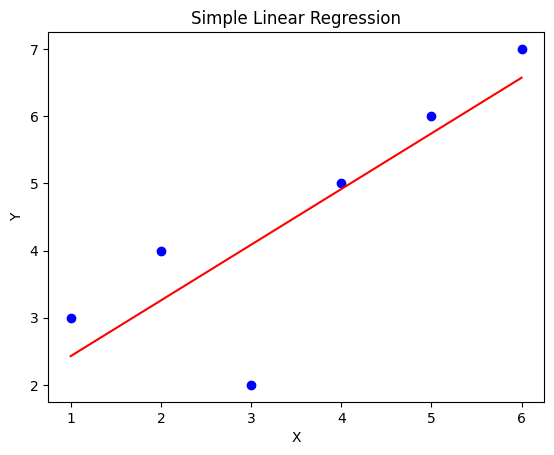

In [5]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Sample data
X = np.array([1, 2, 3, 4, 5, 6]).reshape((-1, 1))
Y = np.array([3, 4, 2, 5, 6, 7])

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X, Y)

# Make predictions
Y_pred = model.predict(X)

# Plot the data points and the regression line
plt.scatter(X, Y, color='blue')
plt.plot(X, Y_pred, color='red')
plt.title('Simple Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
